In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Sandesh/Desktop/hate-speech-dataset/annotations_metadata.csv")

In [3]:
df.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [4]:
len(df['user_id'].value_counts())

2792

In [5]:
len(df['subforum_id'].value_counts())

21

In [6]:
len(df['num_contexts'].value_counts())

20

In [7]:
mydir = 'C:\\Users\\Sandesh\\Desktop\\hate-speech-dataset\\all_files'

In [8]:
def get_comment(file):
    with open(os.path.join(mydir,file+".txt"), 'r', encoding='utf8') as f:
        return f.read().lower()
    return

In [9]:
df['text'] = df['file_id'].apply(lambda x:get_comment(x))

In [10]:
df.head()

,file_id,user_id,subforum_id,num_contexts,label,text
0,12834217_1,572066,1346,0,noHate,"as of march 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,in order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,click below for a free download of a colorfull...
4,12834217_5,572066,1346,0,noHate,click on the `` download ( 7.42 mb ) '' green ...


In [11]:
df.label.value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

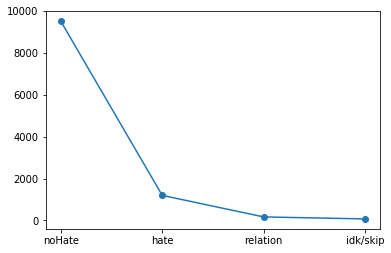

In [12]:
plt.plot(df.label.value_counts(),'o-')

In [13]:
mapping = {'noHate': 1, 'hate':2, 'relation':3,'idk/skip':4 }
df['new_label'] = df['label'].apply(lambda s: mapping.get(s))

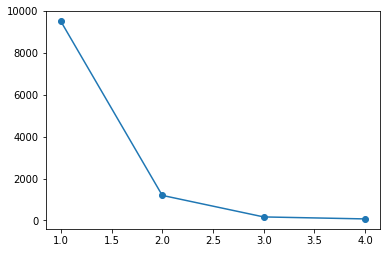

In [14]:
plt.plot(df.new_label.value_counts(),'o-')

In [15]:
df1 = df[['text','new_label']]

In [16]:
df1.head()

,text,new_label
0,"as of march 13th , 2014 , the booklet had been...",1
1,in order to help increase the booklets downloa...,1
2,( simply copy and paste the following text int...,1
3,click below for a free download of a colorfull...,2
4,click on the `` download ( 7.42 mb ) '' green ...,1


In [17]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(binary=False)
# cv.fit(df1)
# X = cv.transform(df1['text'])
# label = df1['new_label']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.text).toarray()
labels = df.new_label
features.shape

(10944, 3250)

In [19]:
labels.shape

(10944,)

In [20]:
features[0].shape

(3250,)

In [21]:
df1.columns

Index(['text', 'new_label'], dtype='object')

In [22]:
from sklearn.feature_selection import chi2
import numpy as np

N = 10
for comment, tag in df[['subforum_id','num_contexts','label']].items():
    features_chi2 = chi2(features, labels == tag)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(comment))
    print("  . Most correlated unigrams:\n. {}\n".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("-------------------------------------------------------------------")

# 'subforum_id':
  . Most correlated unigrams:
. foreigners
. forest
. forever
. forget
. forgot
. forgotten
. form
. forms
. forces
. zoo

  . Most correlated bigrams:
. good news
. good thing
. good white
. good luck
. feel sorry
. fox news
. free download
. free pm
. friends family
. forum solely
-------------------------------------------------------------------
# 'num_contexts':
  . Most correlated unigrams:
. positive
. deadly
. 2001
. state
. natives
. bet
. better
. absolutely
. serve
. idiots

  . Most correlated bigrams:
. white house
. race traitor
. day day
. irish people
. light brown
. people living
. anti white
. stay home
. think good
. black metal
-------------------------------------------------------------------
# 'label':
  . Most correlated unigrams:
. foreigners
. forest
. forever
. forget
. forgot
. forgotten
. form
. forms
. forces
. zoo

  . Most correlated bigrams:
. good news
. good thing
. good white
. good luck
. feel sorry
. fox news
. free download
. free

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    features,labels, train_size=0.75
)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8208, 3250) (2736, 3250) (8208,) (2736,)


In [26]:
# for c in [0.01, 0.05, 0.25, 0.5, 1]:
#     lr = LogisticRegression(C=c)
#     lr.fit(X_train, y_train)
#     y_pred = lr.predict(X_test)
#     print ("Accuracy for C=%s: %s" % (c, accuracy_score(X_test, lr.predict(y_test)))) 

In [27]:
#Training
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    ## solver and multi_class parameter are added to avoid warnings
    lr = LogisticRegression(C=c,solver='lbfgs',multi_class='auto')
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8691520467836257
Accuracy for C=0.05: 0.8691520467836257
Accuracy for C=0.25: 0.868421052631579
Accuracy for C=0.5: 0.8709795321637427
Accuracy for C=1: 0.8775584795321637


In [28]:
## Cross validation
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=1,solver='lbfgs',multi_class='auto')
cross_val_score(model, features, labels, scoring='accuracy', cv=5)

array([0.87357371, 0.87214612, 0.87939698, 0.87562872, 0.87334248])

In [29]:
## Final Model
final_model = LogisticRegression(C=1,solver='lbfgs',multi_class='auto')
final_model.fit(features, labels)
print ("Final Accuracy: %s" 
       % accuracy_score(labels, final_model.predict(features)))

Final Accuracy: 0.8974780701754386


In [30]:
# feature_to_coef = {
#     word: coef for word, coef in zip(
#         cv.get_feature_names(), final_model.coef_[0]
#     )
# }
# for best_positive in sorted(
#     feature_to_coef.items(), 
#     key=lambda x: x[1], 
#     reverse=True)[:5]:
#     print (best_positive)

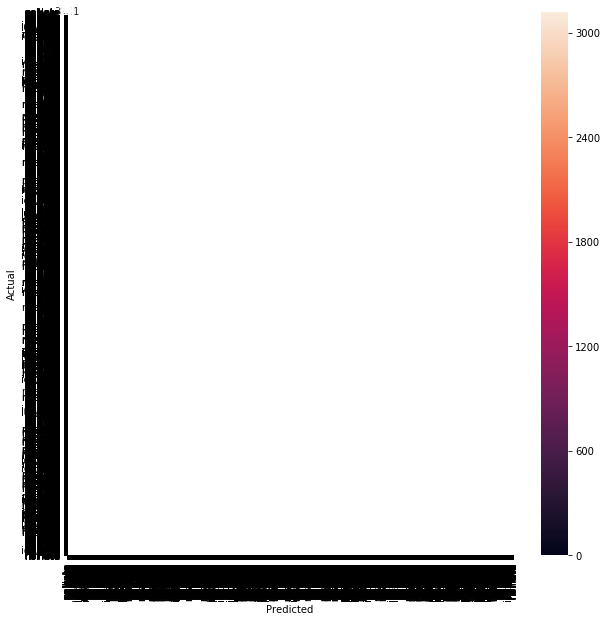

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = LogisticRegression(C=1,solver='lbfgs',multi_class='auto')

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df1.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df.label.values, yticklabels=df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

              precision    recall  f1-score   support

      noHate       0.88      0.99      0.93      3147
        hate       0.65      0.13      0.21       385
    idk/skip       0.00      0.00      0.00        55
    relation       0.75      0.24      0.36        25

    accuracy                           0.88      3612
   macro avg       0.57      0.34      0.38      3612
weighted avg       0.85      0.88      0.84      3612



c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
